In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import logomaker as lm
from tqdm.auto import tqdm
%matplotlib inline

In [5]:
#open??

In [22]:
# This function parse the ouput of PerkinElmer 
# Scan Array CSV File to find the start and end 
# of the output table
# It also find the cyanine 5 channel (CH1, CH2 or CH3)
# that contains
# the SH2 domain reading 
def parse_text(start_line='BEGIN DATA', out_file_path=''):
    a=0
    start = 0
    end = 0
    #errors='ignore' to skip 0xb5 - µ
    for l in open(out_file_path,encoding="utf-8",errors='ignore'):
        #l=str(l)
        a+=1
        if l.startswith(start_line):
            start += a
        if l.startswith('END DATA'):
            end += a
        if 'Cyanine 5' in l:
            ch = l.split(',')[1]
            ch = ch.replace('H','h')
    return start, end, ch

In [34]:
df.columns


Index(['Index', 'Array Row', 'Array Column', 'Spot Row', 'Spot Column', 'Name',
       'ID', 'X', 'Y', 'Diameter', 'F Pixels', 'B Pixels', 'Footprint',
       'Flags', 'Ch1 Median', 'Ch1 Mean', 'Ch1 SD', 'Ch1 B Median',
       'Ch1 B Mean', 'Ch1 B SD', 'Ch1 % > B + 1 SD', 'Ch1 % > B + 2 SD',
       'Ch1 F % Sat.', 'Ch1 Median - B', 'Ch1 Mean - B',
       'Ch1 SignalNoiseRatio', 'Ch2 Median', 'Ch2 Mean', 'Ch2 SD',
       'Ch2 B Median', 'Ch2 B Mean', 'Ch2 B SD', 'Ch2 % > B + 1 SD',
       'Ch2 % > B + 2 SD', 'Ch2 F % Sat.', 'Ch2 Median - B', 'Ch2 Mean - B',
       'Ch2 SignalNoiseRatio', 'Ch2 Ratio of Medians', 'Ch2 Ratio of Means',
       'Ch2 Median of Ratios', 'Ch2 Mean of Ratios', 'Ch2 Ratios SD',
       'Ch2 Rgn Ratio', 'Ch2 Rgn R�', 'Ch2 Log Ratio', 'Sum of Medians',
       'Sum of Means', 'Ch1 N Median', 'Ch1 N Mean', 'Ch1 N (Median-B)',
       'Ch1 N (Mean-B)', 'Ch2 N Median', 'Ch2 N Mean', 'Ch2 N (Median-B)',
       'Ch2 N (Mean-B)', 'Ch2 N Ratio of Medians', 'Ch2 N Ratio of Me

In [39]:
#tag=' SignalNoiseRatio'
#out_file_path = os.path.join('data_file_post','811-19_PI3K-P55G-NC.csv')
#start, end , ch = parse_text(out_file_path=out_file_path)
#df = pd.read_table(out_file_path, sep=',',
#                           skiprows=start, engine ='python', 
#                           skipfooter=1)
#temp = df.groupby('Name')[ch+tag].median().sort_values(ascending = False)


In [40]:
#ch+tag, 'Ch2 SignalNoiseRatio'


In [25]:
def get_dict_experiment(ch, tag=' Median - B'):
    dict_exp = {}
    a=0
    for chip in tqdm(os.listdir('data_file_post')):
        try:
            out_file_path = os.path.join('data_file_post',chip)
            start, end , ch = parse_text(out_file_path=out_file_path)

            #print(start, end , ch, chip)
            df = pd.read_table(out_file_path, sep=',',
                           skiprows=start, engine ='python', 
                           skipfooter=1)
            temp = df.groupby('Name')[ch+tag].median().sort_values(ascending = False)
            dict_exp[chip]=temp
            a+=1
        except:
            print(start, end , ch, chip)
    print(a)
    return dict_exp

In [41]:
dict_exp_median = get_dict_experiment(ch, tag=' Median - B')
dict_exp_sNr = get_dict_experiment(ch, tag=' SignalNoiseRatio')


73



73


In [42]:
db_data = pd.read_csv('SH2_all_logratio_values.csv',sep='\t')
db_data.head()

,spot_index,spot_type,sequence,description,spot_flag,SH2_ABL1_17-09-2006__714-59,SH2_ABL2_15-09-2006__714-58,SH2_APS_21-09-2006__714-34,SH2_BLK_14-09-2006__714-49,SH2_BRDG1_09-08-2006__714-75,...,SH2_BksSH2_22-09-2006__714-35,SH2_SykNSH2_22-09-2006__714-36,SH2_SykCSH2_22-09-2006__714-38,SH2_N_SHP2_4-05-2007__811-57,SH2_TENSIN-1_27-03-2007__811-48,SH2_TENSIN3_21-02-2007__811-25,SH2_TENC1_8-09-2006__714-62,SH2_SRC_01-03-2007__811-30,SH2_CBL_18-06-2007__816-10,SH2_CBLB_18-01-2007__811-11
0,1,Interactor,GNEPDKYPCNGQV,NaN,GOOD,0.135,1.612,0.016,0.066,0.027,...,0.041,0.209,0.034,-0.044,-0.072,-0.083,0.039,-0.049,-0.012,-0.002
1,2,Interactor,NLSQGGYEELERV,NaN,GOOD,0.196,0.233,0.033,0.112,-0.027,...,-0.014,0.094,0.087,0.041,0.078,0.002,0.078,0.097,-0.103,-0.040
2,3,Interactor,ALAAEGYYDIRRV,NaN,GOOD,0.117,0.246,0.042,0.076,0.000,...,0.000,-0.033,0.122,0.033,0.051,0.103,0.088,0.096,0.046,0.072
3,4,Interactor,QHDEPCYWRLTRV,NaN,GOOD,0.068,0.077,0.139,0.037,-0.023,...,0.000,0.025,0.056,-0.044,-0.044,-0.098,-0.012,-0.047,-0.095,-0.204
4,5,Interactor,EAGKPIYSRYGSV,NaN,GOOD,-0.021,0.109,-0.054,0.010,-0.024,...,0.041,0.023,-0.068,0.009,-0.128,-0.106,-0.062,-0.047,-0.025,-0.063


714-68_CRK.csv SH2_CRK_09-08-2006__714-68


/Users/MTinti/miniconda3/envs/myEnv/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':
/Users/MTinti/miniconda3/envs/myEnv/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log2
  if sys.path[0] == '':


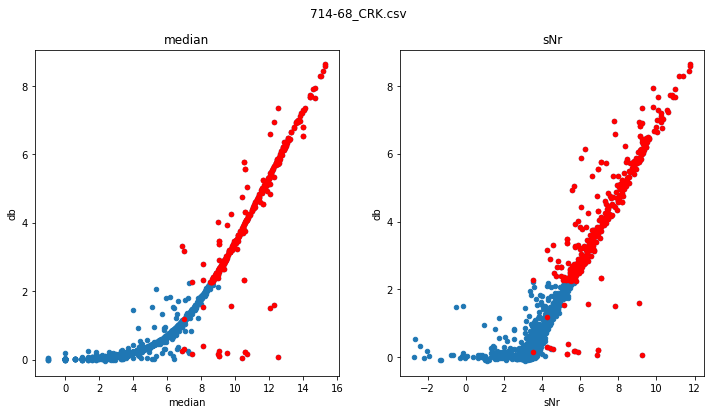

811-18_PI3K-P85-NC.csv SH2_PI3K_P85_N_C_18-01-2007__811-18


/Users/MTinti/miniconda3/envs/myEnv/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/Users/MTinti/miniconda3/envs/myEnv/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


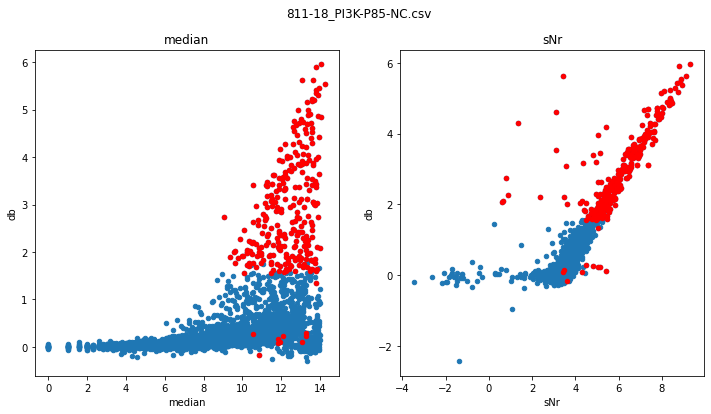

811-60_LSK.csv SH2_LSK_4-05-2007__811-60


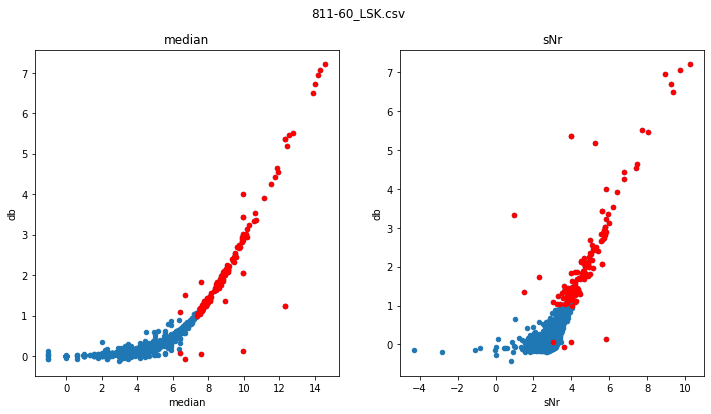

714-27_FRK.csv SH2_FRK_15-09-2006__714-27


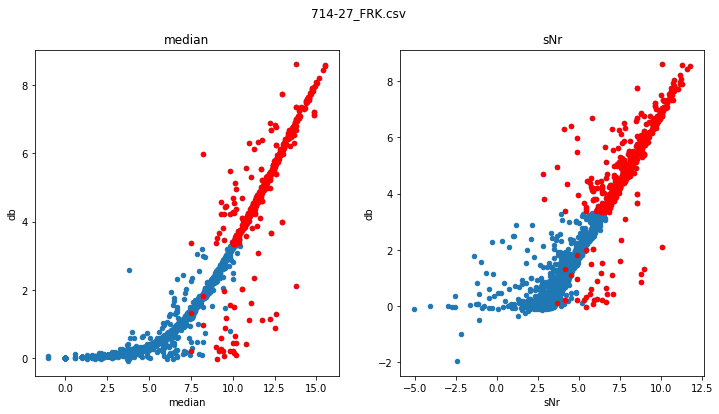

811-24_NAP4.csv SH2_NAP4_03-01-2007__811-24


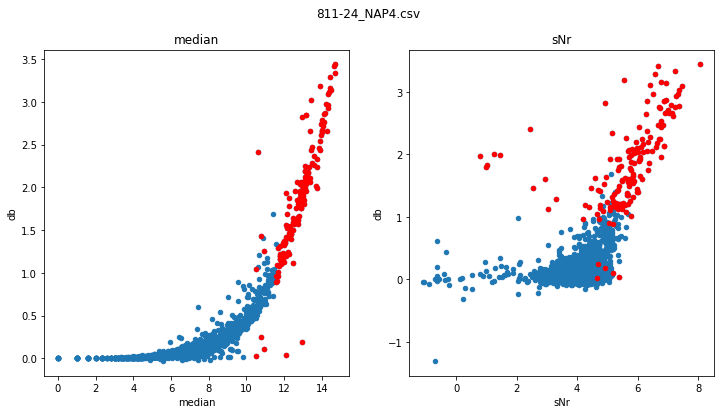

714-34_APS.csv SH2_APS_21-09-2006__714-34


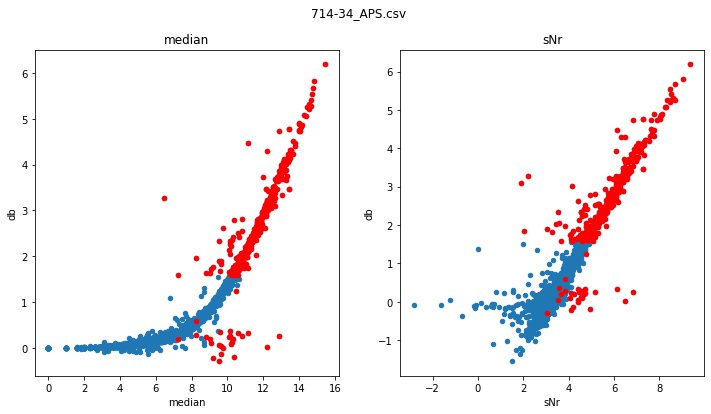

816-10_CBL.csv SH2_CBL_18-06-2007__816-10


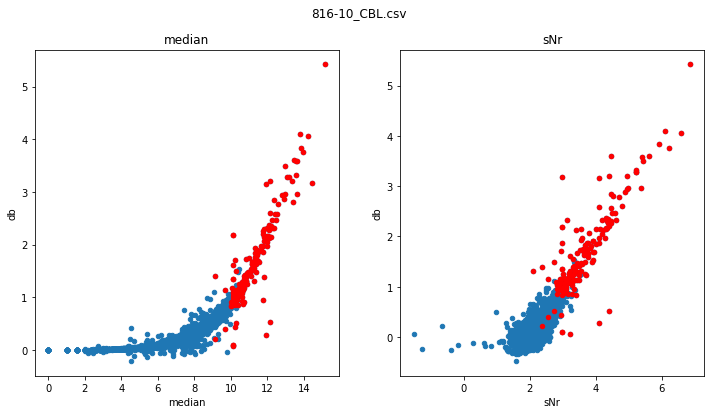

714-64_SHCD.csv SH2_SHCD_24-01-2007__714-64


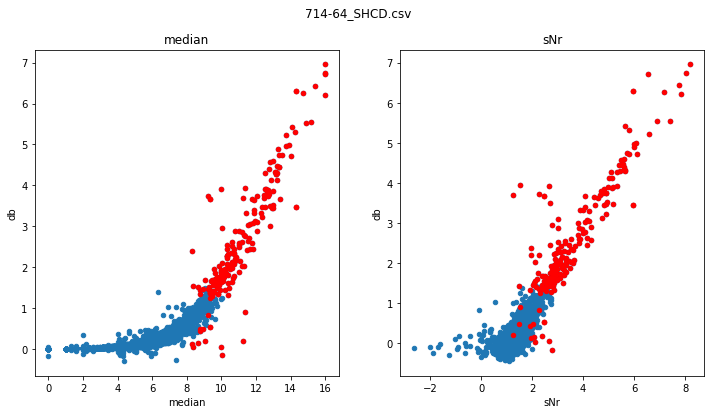

811-48_TENSIN-1.csv SH2_TENSIN-1_27-03-2007__811-48


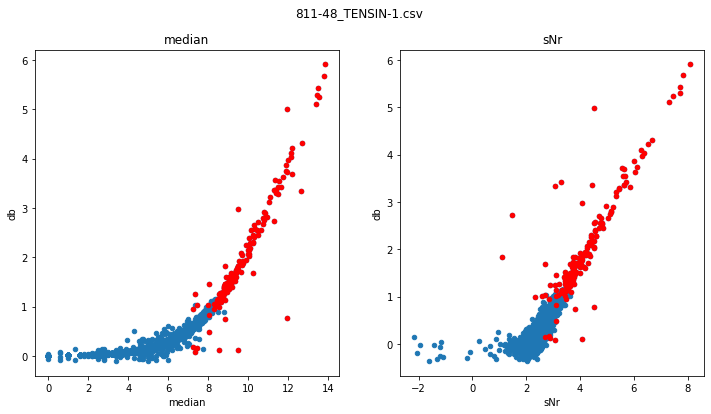

714-56_FYN.csv SH2_FYN_18-09-2006__714-56


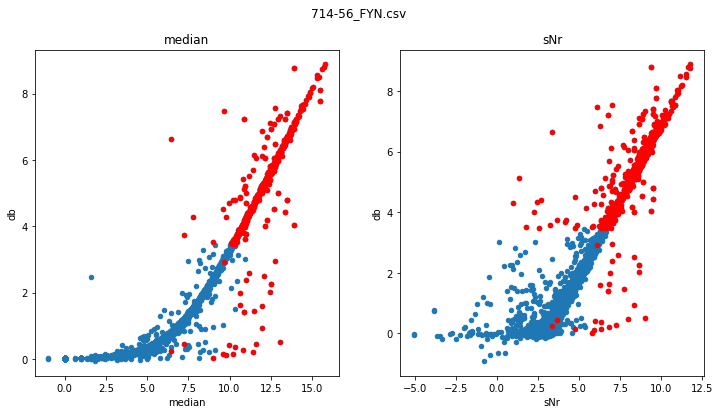

811-30_SRC.csv SH2_SRC_01-03-2007__811-30


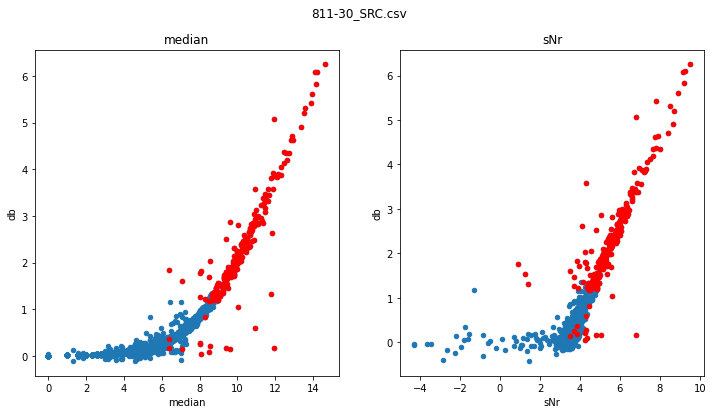

714-55_GRB10.csv SH2_GRB10_14-09-2006__714-55


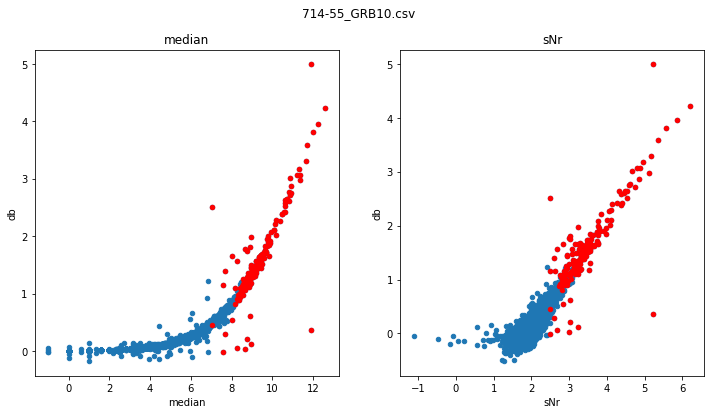

811-49_VAV2.csv SH2_VAV2_27-03-2007__811-49


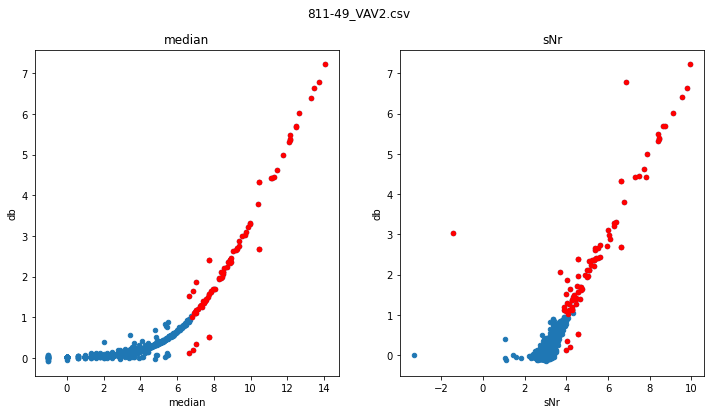

714-57_FYN.csv SH2_FYN_14-09-2006__714-57


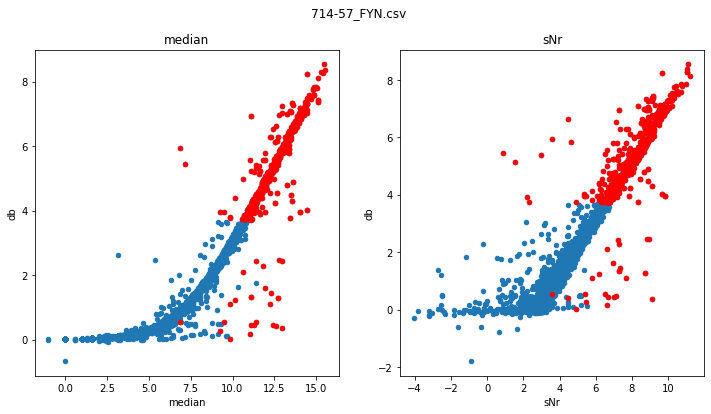

811-25_TENSIN3.csv SH2_TENSIN3_21-02-2007__811-25


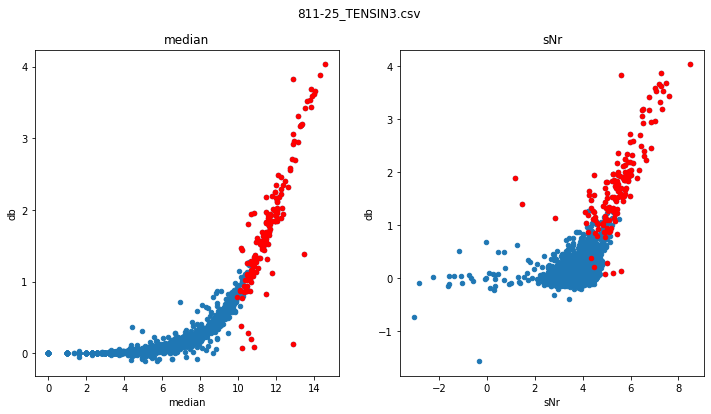

811-65_SHIP2.csv SH2_SHIP2_4-05-2007__811-65


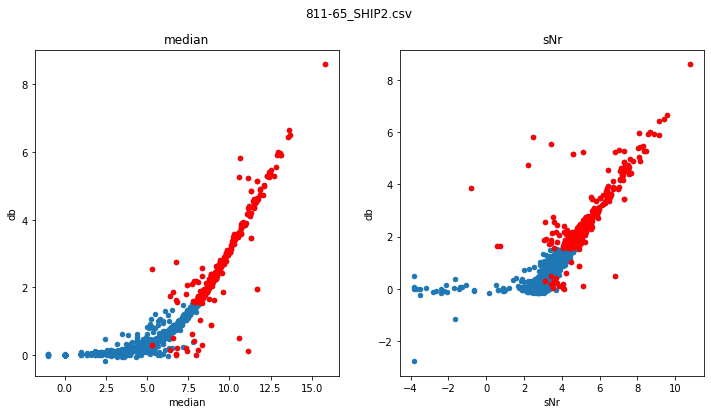

811-59_SH3BP2.csv SH2_SH3BP2_4-05-2007__811-59


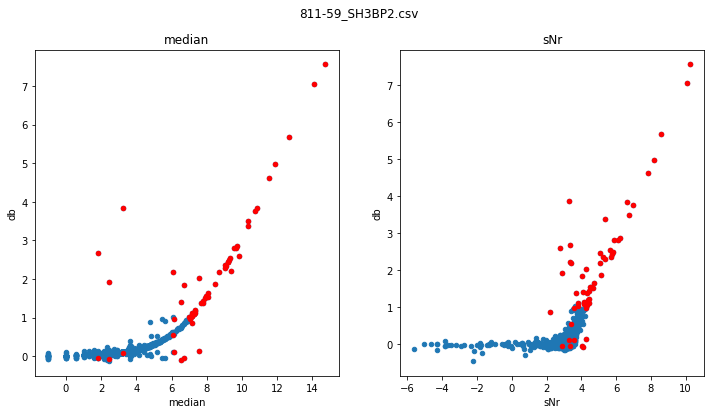

714-65_SLP76.csv SH2_SLP76_24-01-2007__714-65


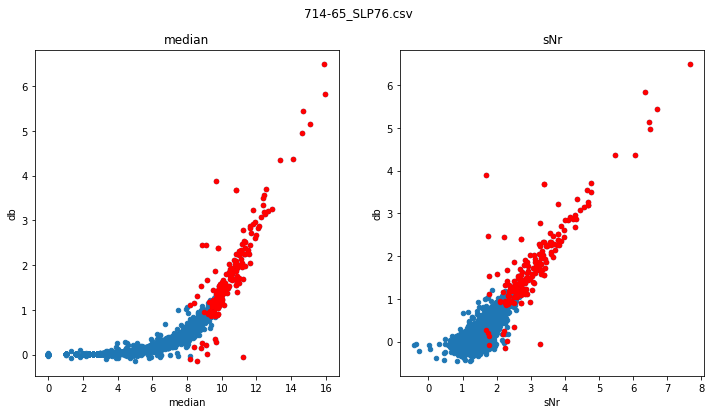

714-48_NCK2-BIS.csv SH2_NCK2_15-09-2006_bis__714-48


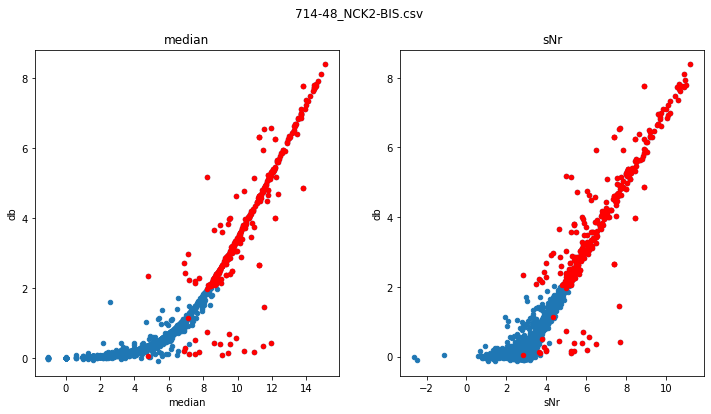

811-44_VRAP.csv SH2_VRAP_15-03-2007__811-44


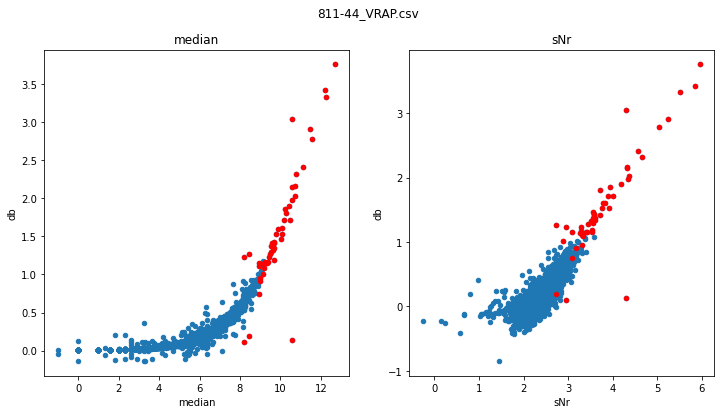

811-23_SHCA.csv SH2_SHCA_2-07-2007__811-23


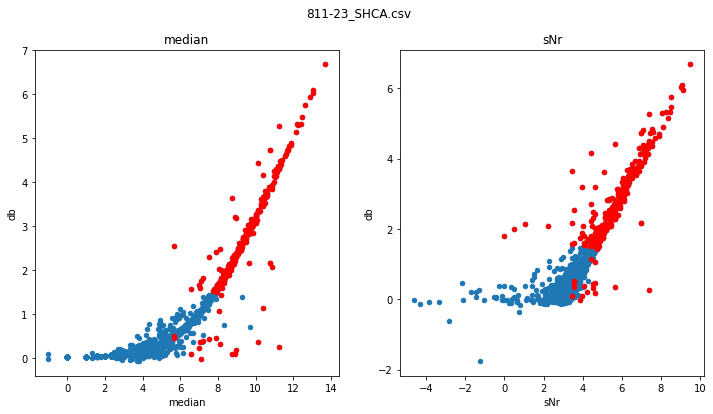

714-73_SH2B.csv SH2_SH2B_10-08-2006__714-73


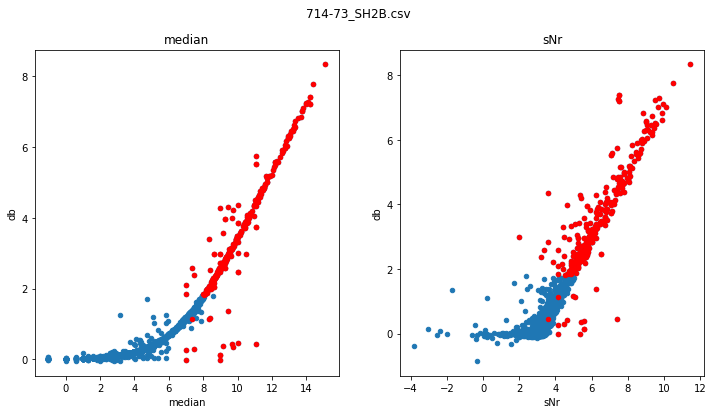

811-20_PTPN6.csv SH2_PTPN6_6-02-2007__811-20


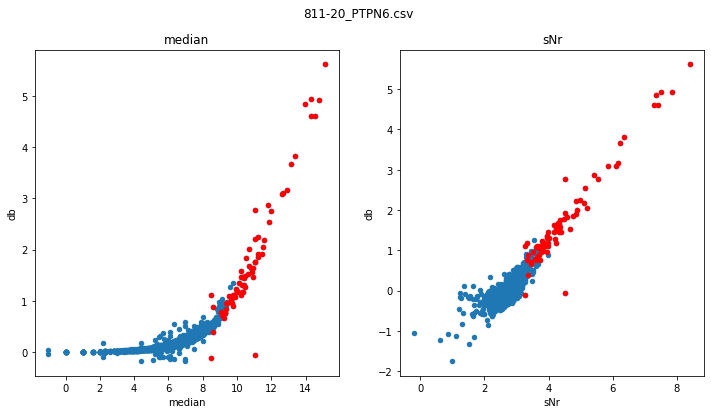

811-3_GRAP2.csv SH2_GRAP2_9-01-2007__811-3


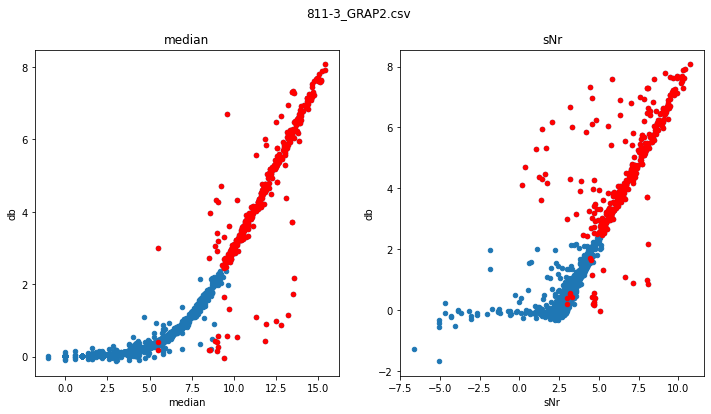

714-29_EAT.csv SH2_EAT_15-09-2006__714-29


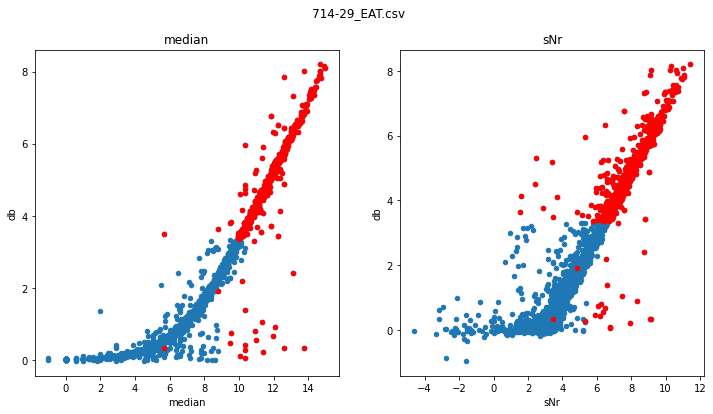

714-35_BksSH2.csv SH2_BksSH2_22-09-2006__714-35


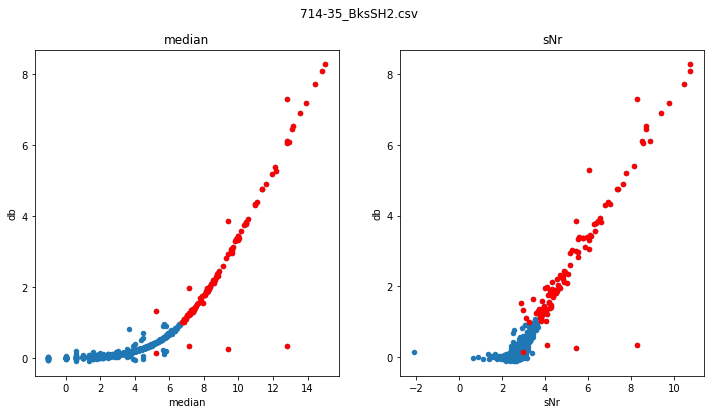

811-46_HSH2.csv SH2_HSH2_28-03-2007__811-46


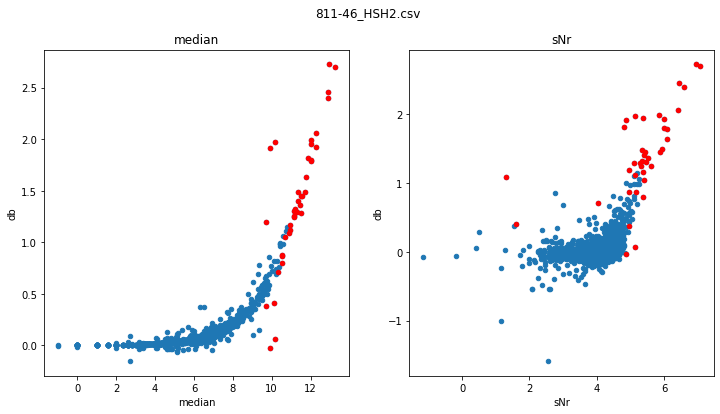

714-54_GRB14.csv SH2_GRB14_14-09-2006__714-54


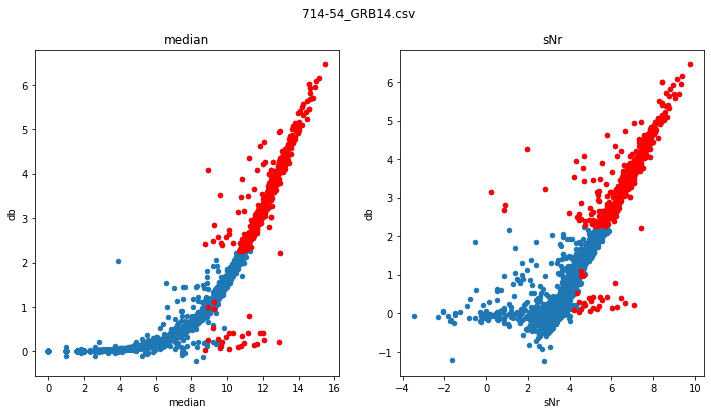

811-47_ZAP70-NC.csv SH2_ZAP70_28-03-2007__811-47


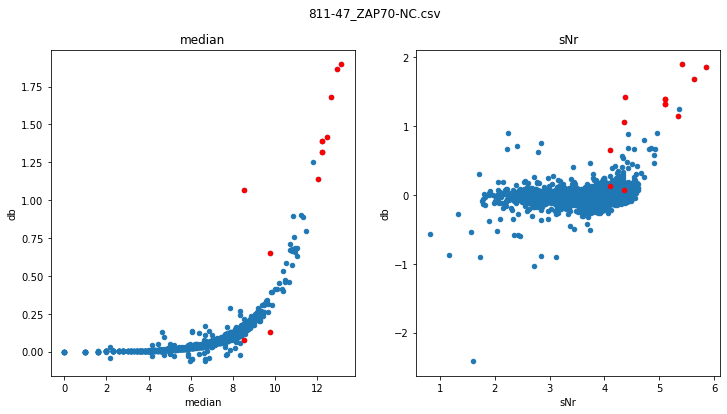

714-52_ITK.csv SH2_ITK_15-09-2006__714-52


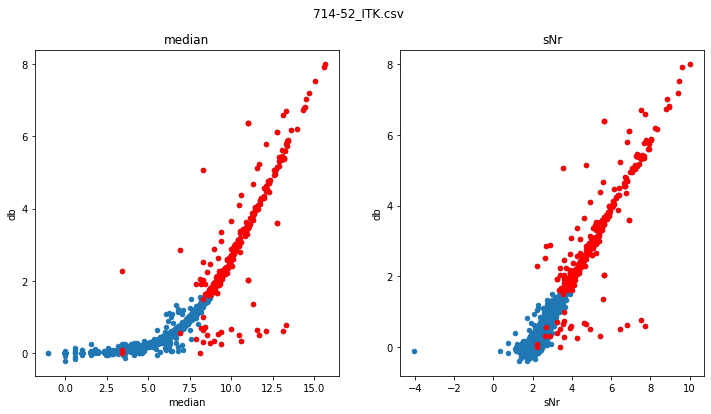

811-11_CBLB.csv SH2_CBLB_18-01-2007__811-11


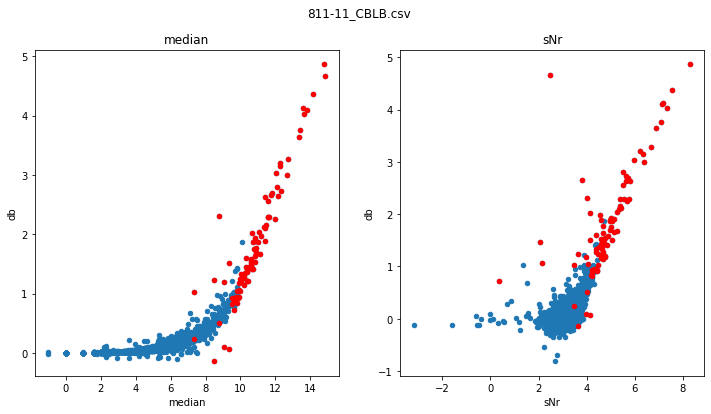

811-39_NSP3.csv SH2_NSP3_13-03-2007__811-39


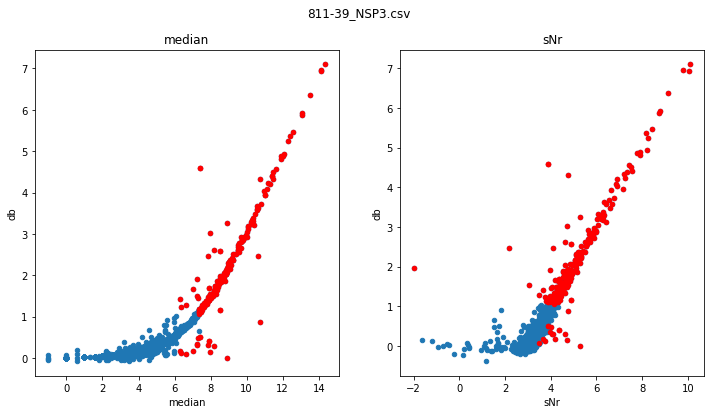

811-55_FES.csv SH2_FES_29-03-2007__811-55


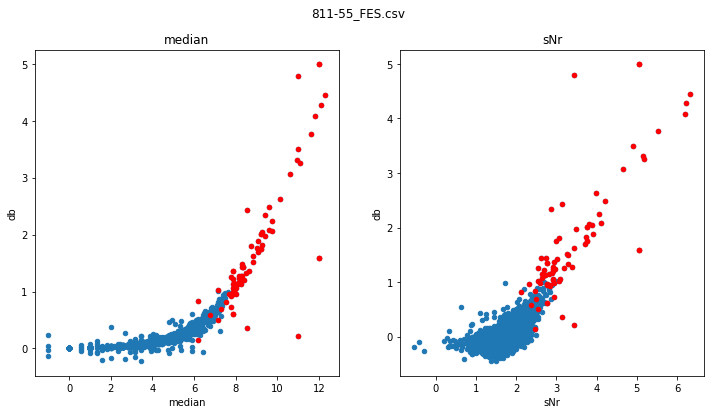

811-41_VAV2.csv SH2_VAV2_15-03-2007__811-41


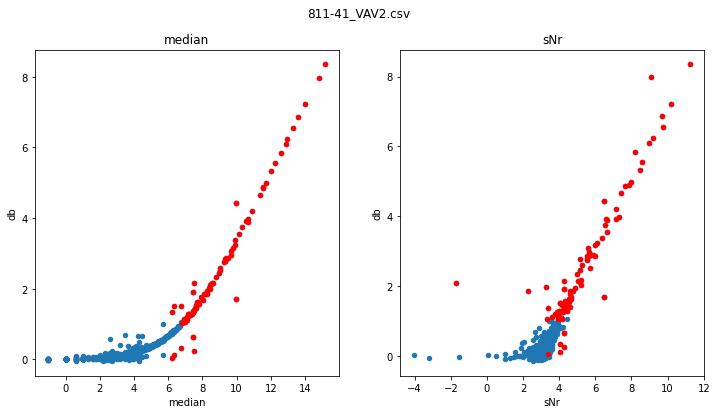

811-50_SHCA.csv SH2_SHCA_4-05-2007__811-50


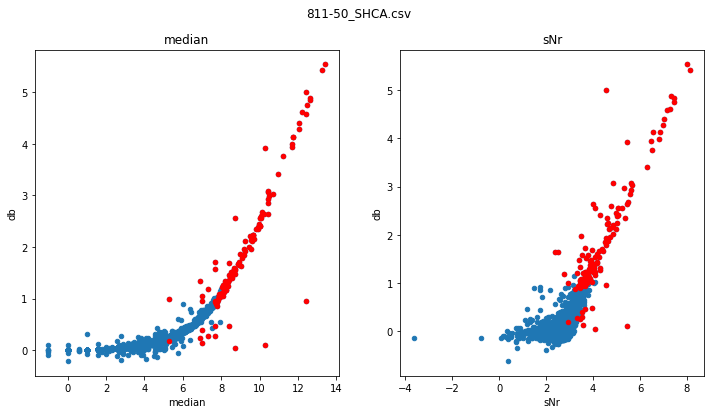

714-75_BRDG1.csv SH2_BRDG1_09-08-2006__714-75


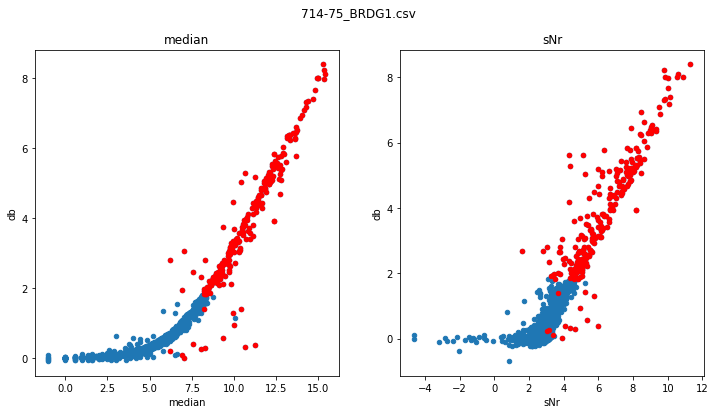

714-50_BTK.csv SH2_BTK_14-09-2006__714-50


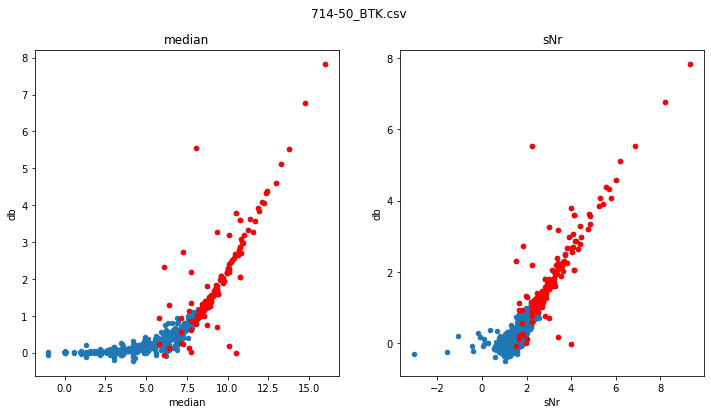

714-74_GRAP2.csv SH2_GRAP2_09-08-2006__714-74


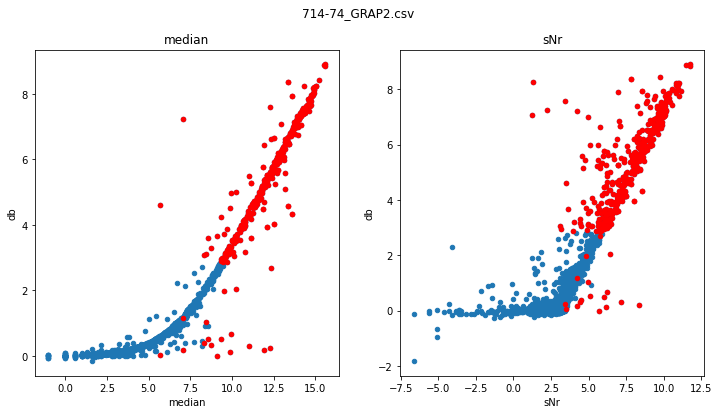

714-51_CSK.csv SH2_CSK_17-09-2006__714-51


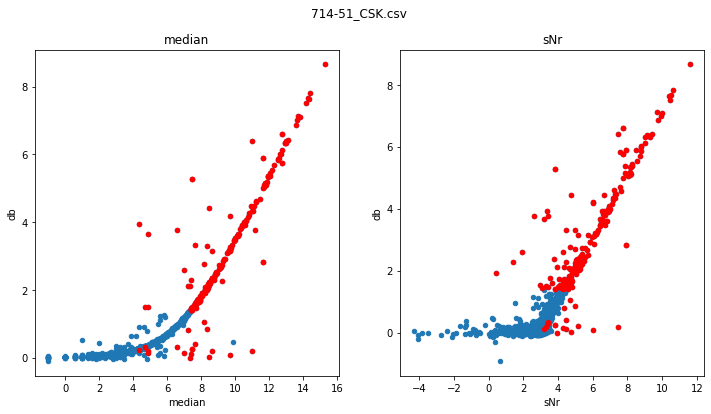

811-66_SHIP1.csv SH2_SHPI1_4-17-2007__811-66


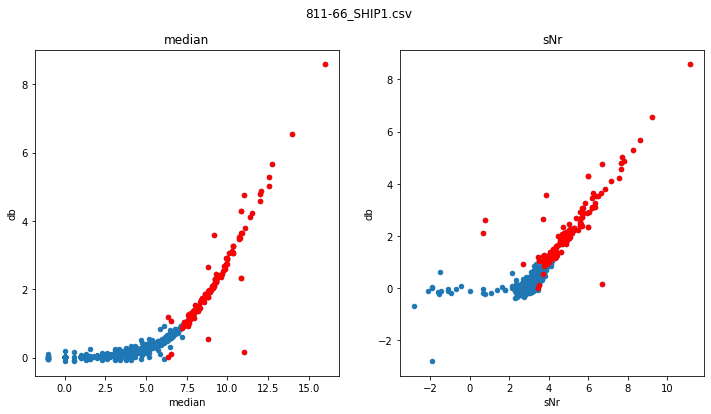

714-38_SykCSH2.csv SH2_SykCSH2_22-09-2006__714-38


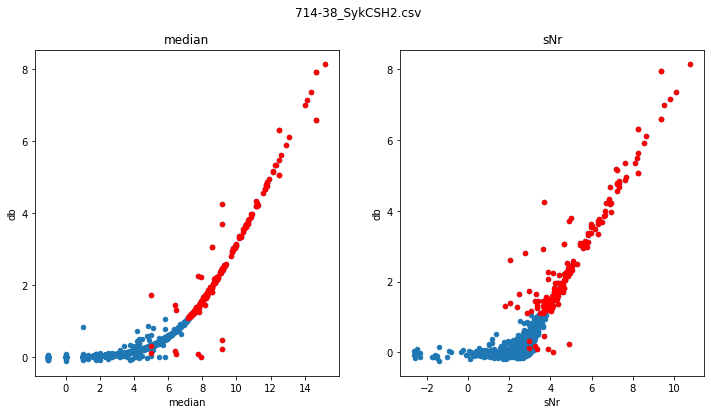

714-49_BLK.csv SH2_BLK_14-09-2006__714-49


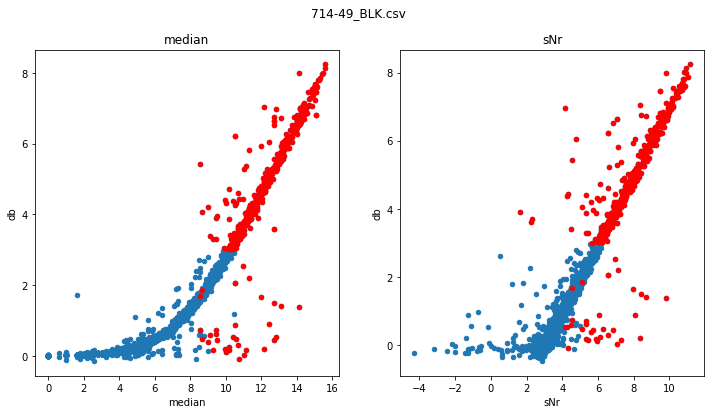

811-19_PI3K-P55G-NC.csv SH2_PI3K_P55G_NC_6-02-2007__811-19


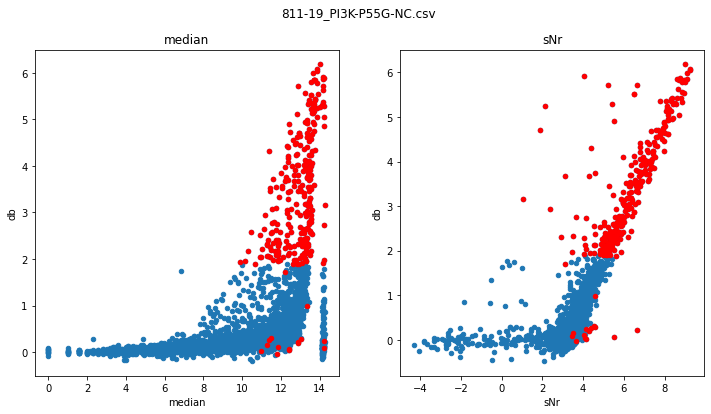

714-60_SHD.csv SH2_SHD_12-09-2006__714-60


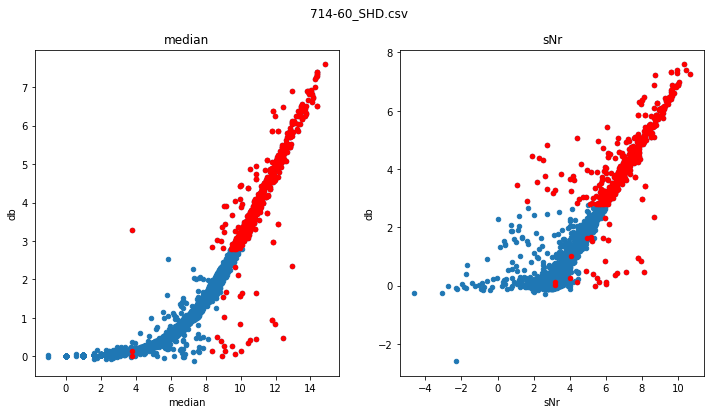

811-57_N-SHP2.csv SH2_N_SHP2_4-05-2007__811-57


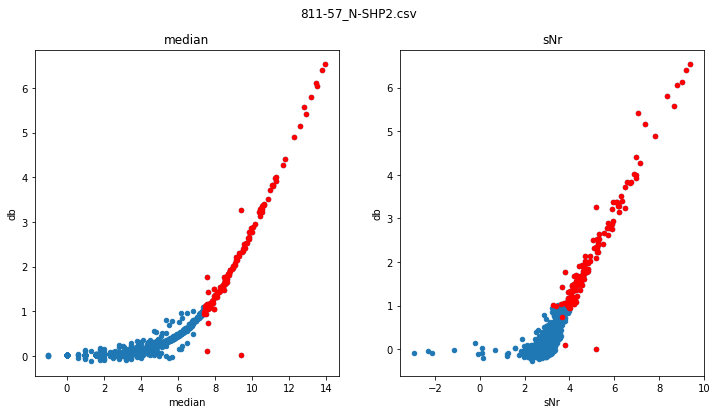

714-31_SH2D1A.csv SH2_SH2D1A_14-09-2006__714-31


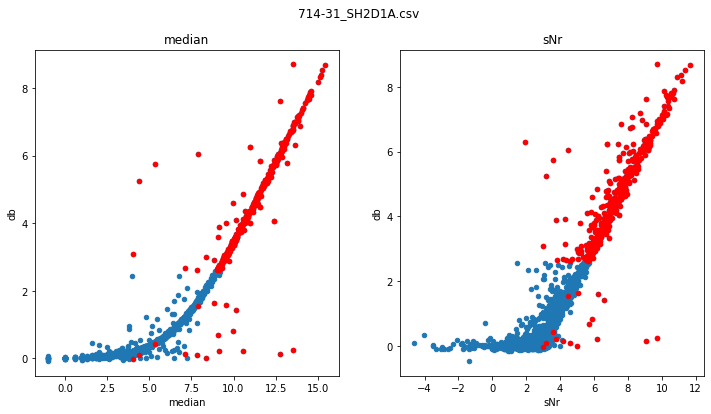

811-54_FER.csv SH2_FER_29-03-2007__811-54


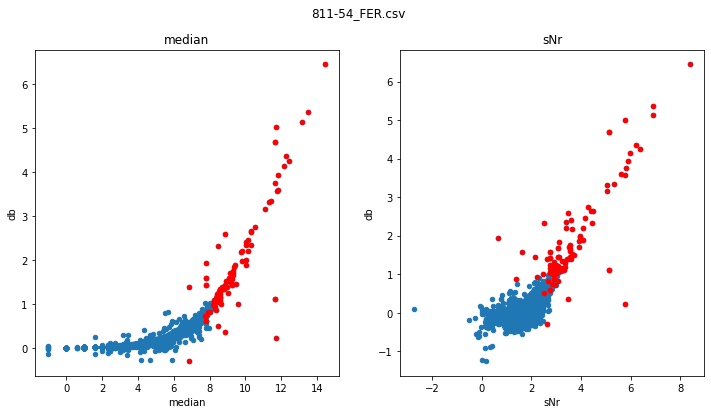

811-37_YES.csv SH2_YES_13-03-2007__811-37


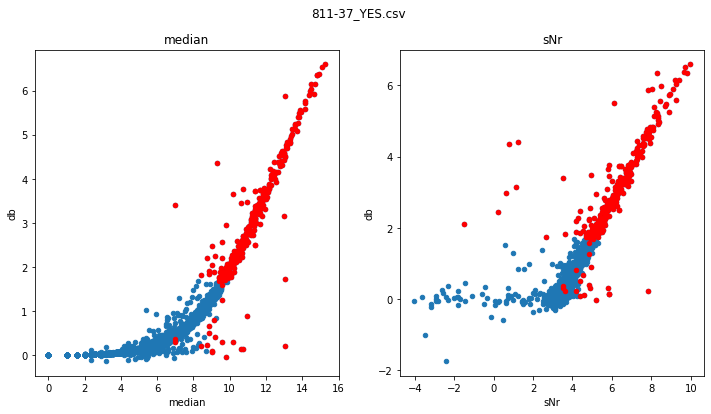

811-38_CTEN.csv SH2_CTEN_13-03-2007__811-38


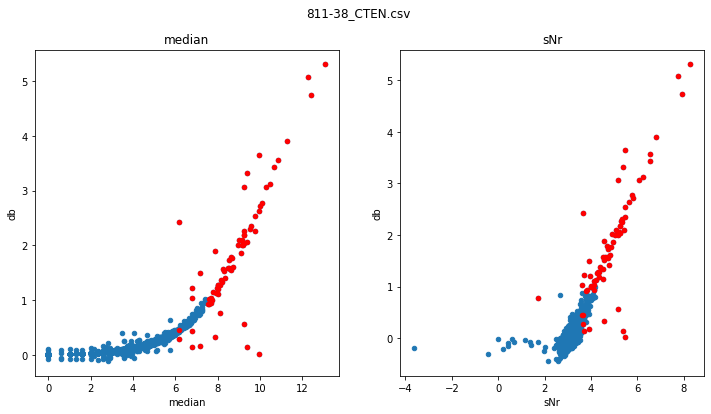

714-61_VAV1.csv SH2_VAV1_14-08-2006__714-61


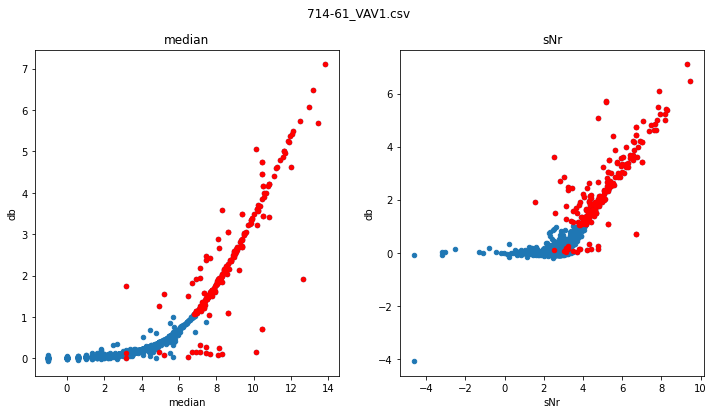

811-51_GRB2.csv SH2_GRB2_28-03-2007__811-51


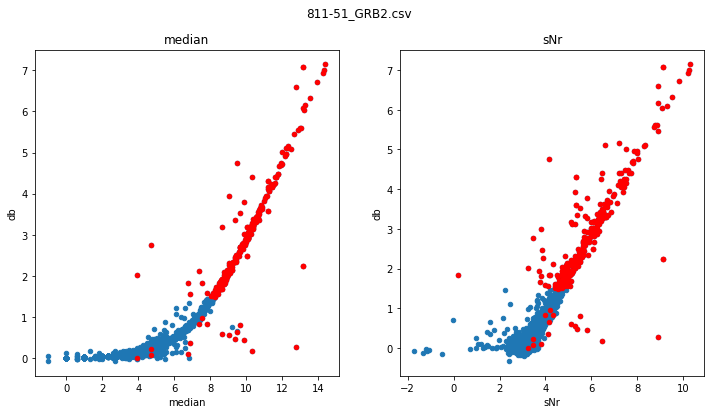

811-22_LYN.csv SH2_LYN_7-02-2007__811-22


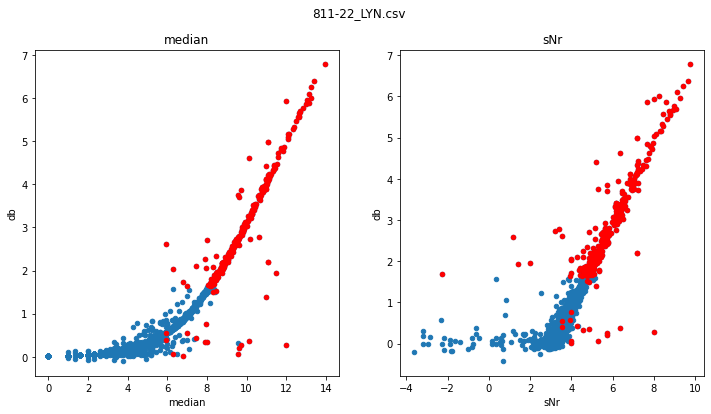

714-58_ABL2.csv SH2_ABL2_15-09-2006__714-58


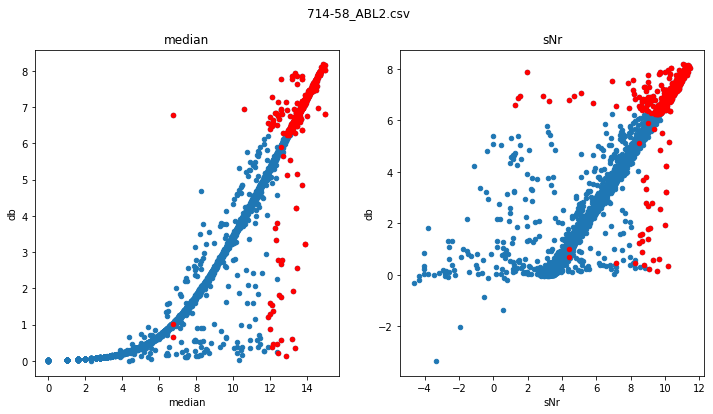

714-30_rasGAP.csv SH2_RASGAP_14-09-2006__714-30


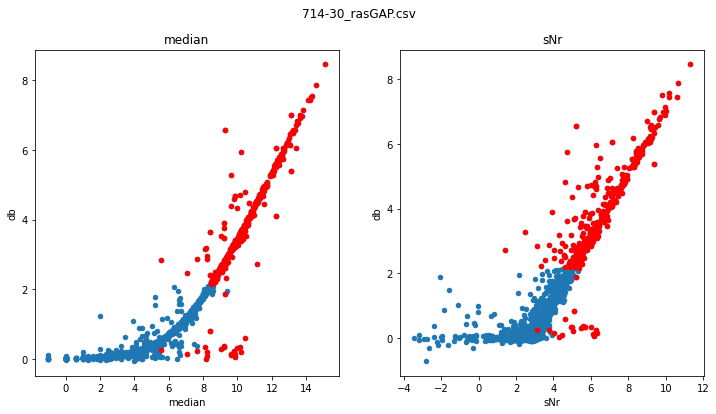

714-41_MIST.csv SH2_MISTSH2_28-09-2006__714-41


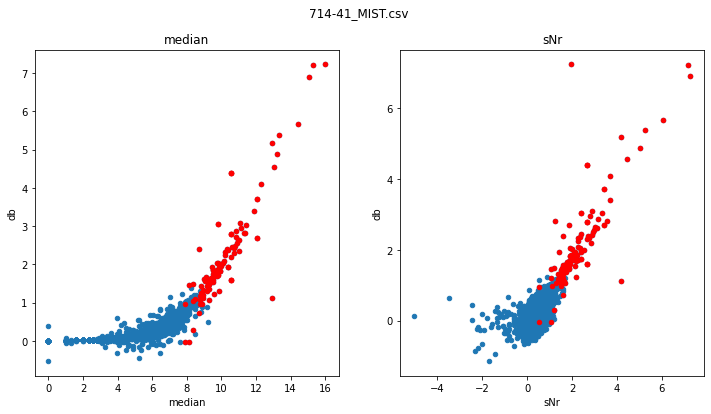

811-21_PTPN11.csv SH2_PTPN11_7-02-2007__811-21


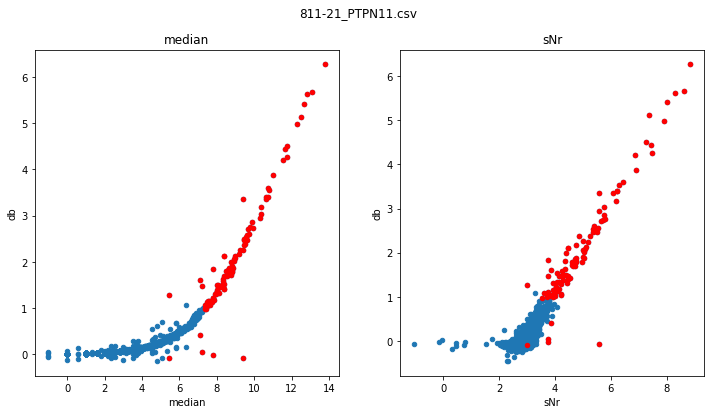

714-66_CRKL.csv SH2_CRKL_2-09-2006__714-66


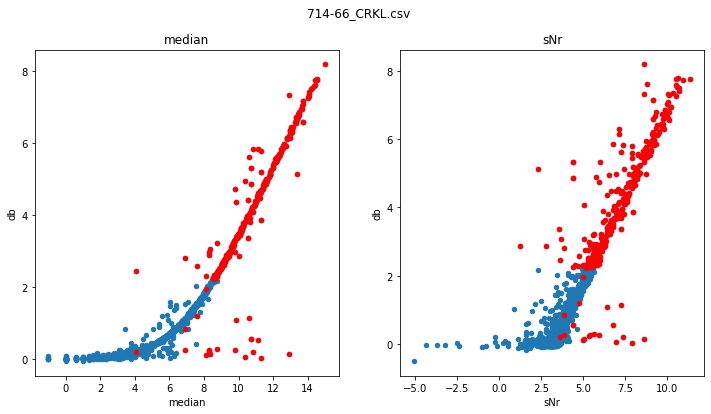

714-59_ABL1.csv SH2_ABL1_17-09-2006__714-59


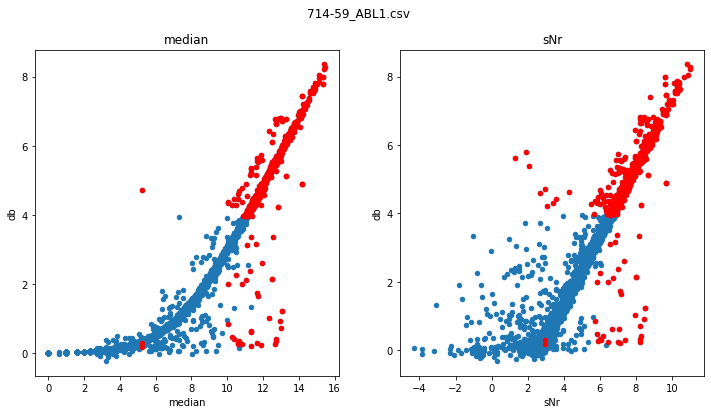

714-47_NCK2.csv SH2_NCK2_15-09-2006__714-47


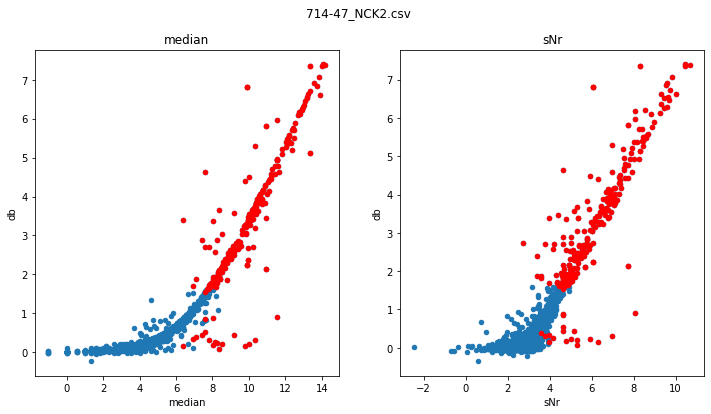

714-53_HCK.csv SH2_HCK_15-09-2006__714-53


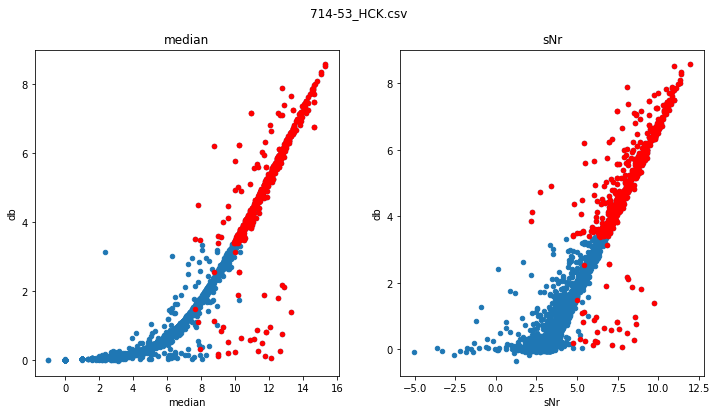

811-43_SRMS.csv SH2_SRMS_15-03-2007__811-43


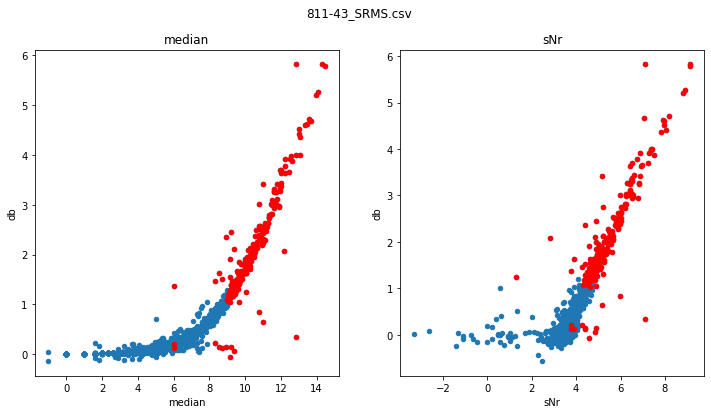

714-36_SykNSH2.csv SH2_SykNSH2_22-09-2006__714-36


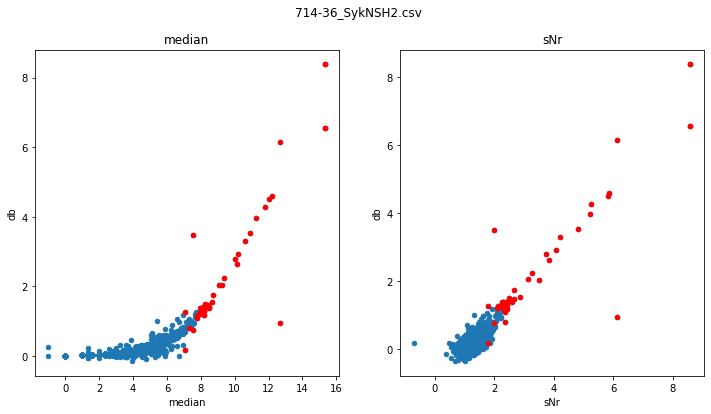

811-42_TXK.csv SH2_TXK_15-03-2007__811-42


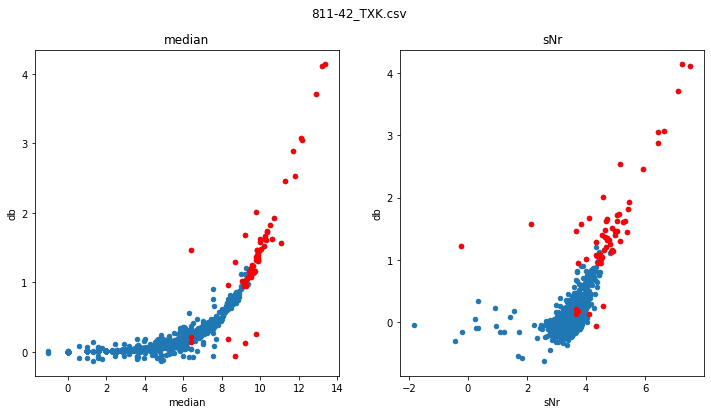

811-69_SHCC.csv SH2_SHCC_20-04-2007__811-69


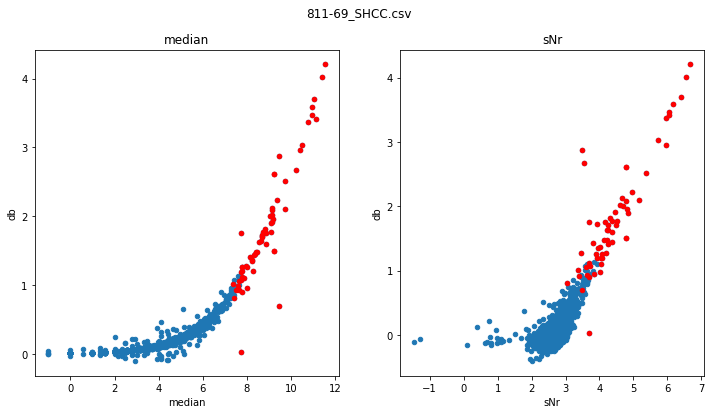

811-53_FGR.csv SH2_FGR_28-03-2007__811-53


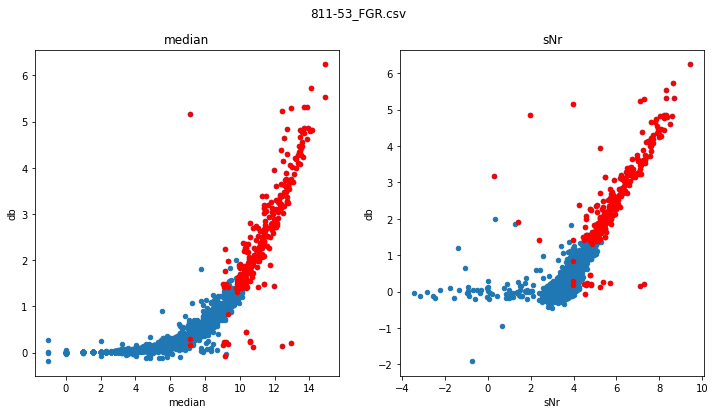

714-62_TENC1.csv SH2_TENC1_8-09-2006__714-62


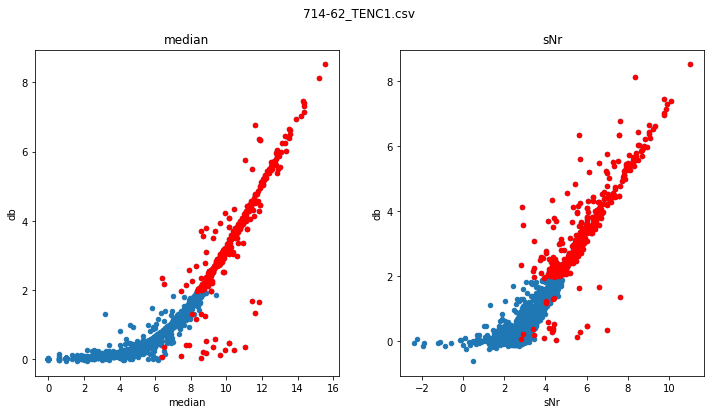

811-34_NSP1.csv SH2_NSP1_03-01-2007__811-34


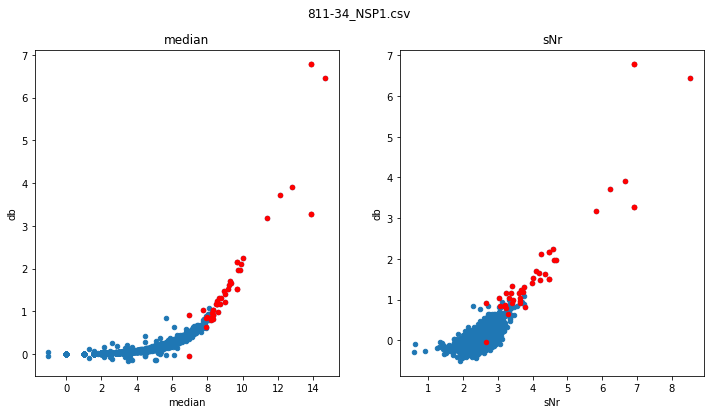

714-67_BRK.csv SH2_BRK_2-09-2006__714-67


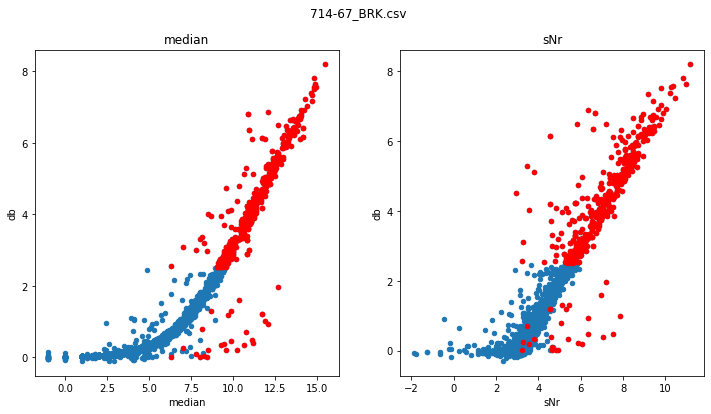

811-63_BMX.csv SH2_BMX_4-05-2007__811-63


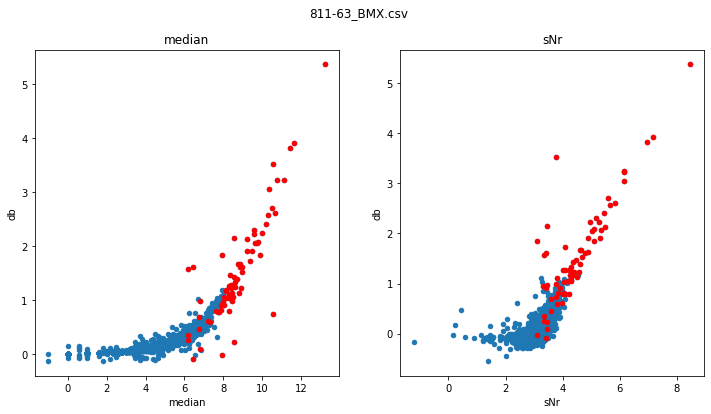

811-35_NSP2.csv SH2_NSP2_03-01-2007__811-35


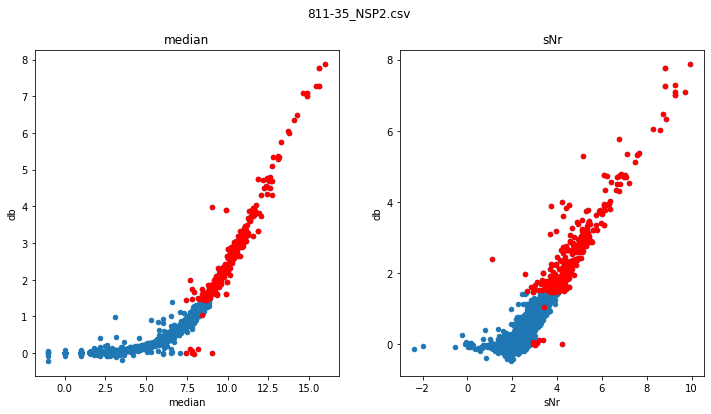

In [55]:
for exp in dict_exp_median.keys():
    #print(exp.split('_')[0])
    for col in db_data.columns:
        if exp.split('_')[0] == col.split('_')[-1]:
            print(exp,col)
            temp_db=db_data[['sequence',col]]
            temp_db=temp_db.set_index('sequence')
            
            temp_exp=dict_exp_median[exp]
            merge = temp_exp.to_frame().join(temp_db)
            merge.columns = ['chip','db']
            merge['chip']=np.log2(merge['chip'])
            
            
            temp_exp=dict_exp_sNr[exp]
            merge = merge.join(temp_exp.to_frame())
            merge.columns = ['median','db','sNr']
            merge['sNr']=np.log2(merge['sNr'])
            
            
            db_binders = pd.read_csv('SH2_all_logratio_binders.csv',sep='\t')
            db_binders=db_binders[['sequence',col]]
            db_binders=db_binders[db_binders[col]==2]
            db_binders=list(db_binders['sequence'])

            fig,axes=plt.subplots(figsize=(12,6),ncols=2)
            merge.plot(kind='scatter',x='median',y='db',ax=axes[0])
            merge.loc[db_binders].plot(kind='scatter',x='median',y='db',c='r',ax=axes[0])
            axes[0].set_title('median')
            
            merge.plot(kind='scatter',x='sNr',y='db',ax=axes[1])
            merge.loc[db_binders].plot(kind='scatter',x='sNr',y='db',c='r',ax=axes[1])  
            axes[1].set_title('sNr')
            
            plt.suptitle(exp)
            plt.show()